In [25]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
#from numpy import fft
from scipy.fftpack import fft, ifft

In [16]:
k0 = 5
N = 50
nv = np.arange(N)
x = np.exp(1j * 2 * np.pi * k0 * nv / N)

/home/tqlong/miniconda3/envs/voice1/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


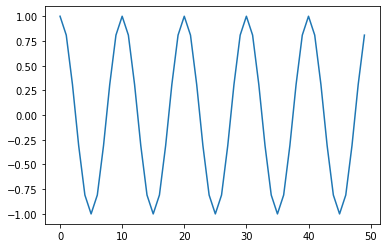

In [17]:
plt.plot(x)
plt.show()

In [18]:
def dft(x):
    N = len(x)
    kv = np.arange(N)
    nv = np.arange(N)
    
    X = [ np.dot(x, np.exp(-1j * 2 * np.pi * k * nv/N) )  for k in kv]
    return X

/home/tqlong/miniconda3/envs/voice1/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


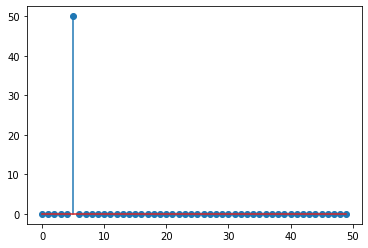

In [19]:
X = dft(x)
plt.stem(np.abs(X))
plt.show()

In [20]:
def idft(X):
    N = len(X)
    kv = np.arange(N)
    nv = np.arange(N)
    
    x = [ np.dot(X, np.exp(1j * 2 * np.pi * n * kv/N) ) / N  for n in nv]
    return x

/home/tqlong/miniconda3/envs/voice1/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


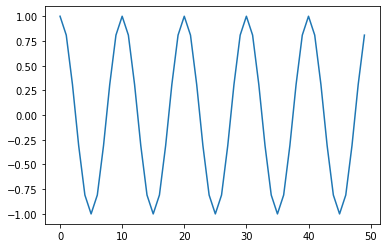

In [24]:
x_recover = idft(X)

plt.plot(x_recover)
plt.show()

/home/tqlong/miniconda3/envs/voice1/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


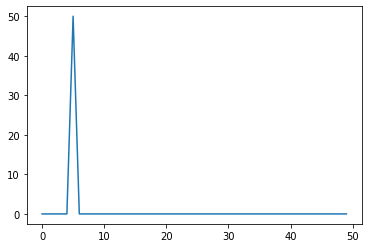

In [27]:
X = fft(x) # Fast Fourier Transform
plt.plot(X)
plt.show()

/home/tqlong/miniconda3/envs/voice1/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


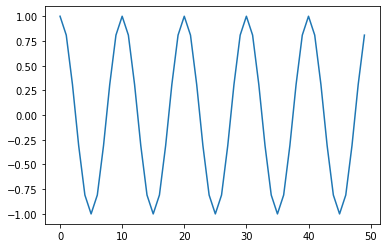

In [28]:
x_recover = ifft(X, )
plt.plot(x_recover)
plt.show()

In [40]:
y, fs = librosa.load('piano.wav', offset=1, duration=1)
print(len(y), fs)

22050 22050


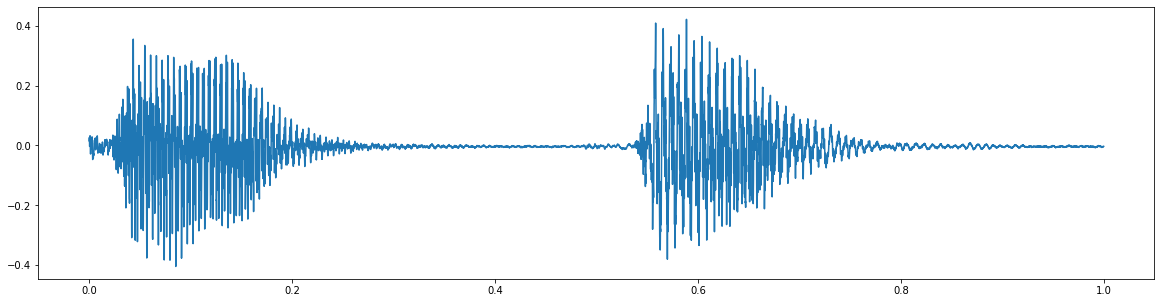

In [32]:
N = len(y)
plt.figure(figsize=(20,5))
plt.plot(np.arange(N)/fs, y)
plt.show()

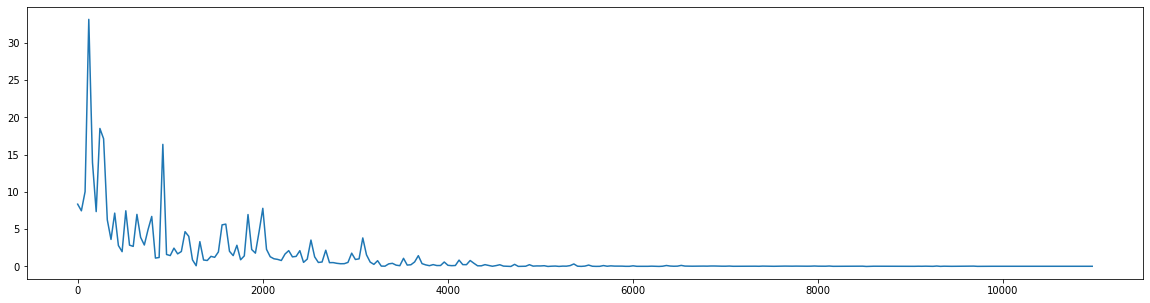

In [41]:
x = y[int(0.6*fs):int(0.625*fs)]
X = fft(x)
N = len(x)
hN = N // 2
plt.figure(figsize=(20,5))
plt.plot(np.arange(hN)/N*fs, np.abs(X[:hN]))
plt.show()

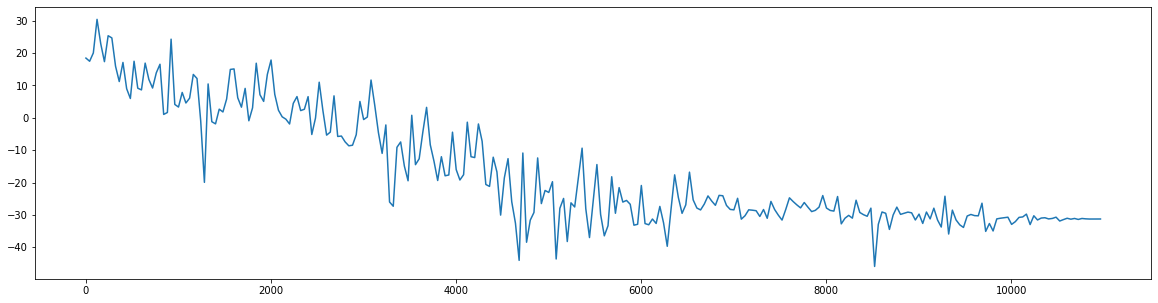

In [42]:
x = y[int(0.6*fs):int(0.625*fs)]
X = fft(x)
N = len(x)
hN = N // 2
plt.figure(figsize=(20,5))
plt.plot(np.arange(hN)/N*fs, 20*np.log10(np.abs(X[:hN]))) # dB
plt.show()

In [39]:
from IPython.display import Audio
y, fs = librosa.load('piano.wav') #, offset=1, duration=1)
Audio(y, rate=fs)

In [43]:
def centered_padded_fft(x1, N, window):
    M = len(x1)
    hN = N//2
    
    x1 = x1 * window / np.sum(window)
    
    fftbuffer = np.zeros(N)
    hM1 = int(math.floor((M+1)/2))
    hM2 = int(math.floor(M/2))
    fftbuffer[:hM1] = x1[hM2:]
    fftbuffer[N-hM2:] = x1[:hM2]

    X = fft(fftbuffer)
    mX = 20*np.log10(np.abs(X[:hN]))
    pX = np.unwrap(np.angle(X[:hN]))
    return mX, pX

def centered_padded_ifft(mX, pX, M):
    N = len(mX)*2
    
    Y = np.zeros(N, dtype=np.complex)
    hN = N//2
    Y[:hN] = 10**(mX/20) * np.exp(1j*pX)
    Y[hN+1:] = 10**(mX[:0:-1]/20) * np.exp(-1j*pX[:0:-1])
    fftbuffer = np.real(ifft(Y))
    
    y = np.zeros(M)
    hM1 = int(math.floor((M+1)/2))
    hM2 = int(math.floor(M/2))
    y[hM2:] = fftbuffer[:hM1]
    y[:hM2] = fftbuffer[N-hM2:]

    return y

In [48]:
from scipy.signal.windows import hann, blackman, blackmanharris, triang
import math
x = y[int(0.6*fs):int(0.625*fs)]
M = len(x)
N = 1024
hN = N // 2
print(f"M {M} N {N}")
mX, pX = centered_padded_fft(x, 1024, blackman(M))


M 551 N 1024


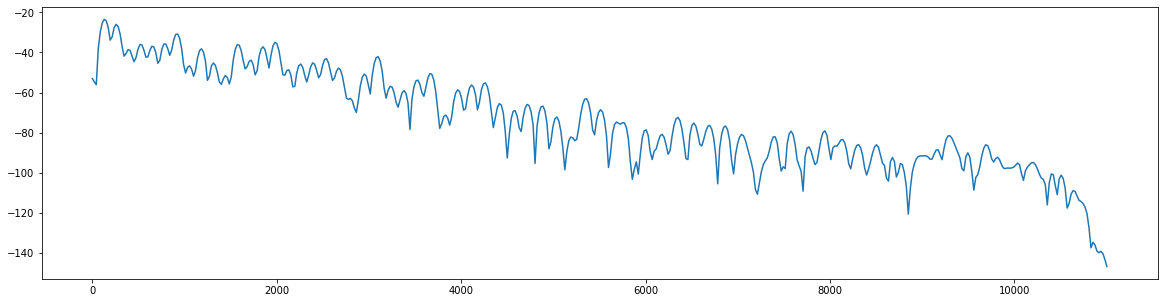

In [49]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(hN)/N*fs, mX) # dB
plt.show()

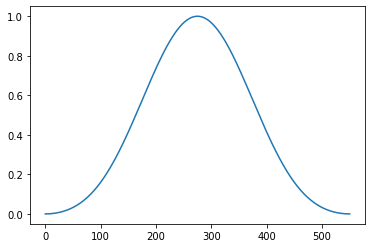

In [50]:
plt.plot(blackman(M))

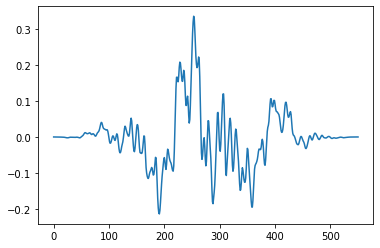

In [51]:
plt.plot(x*blackman(M))

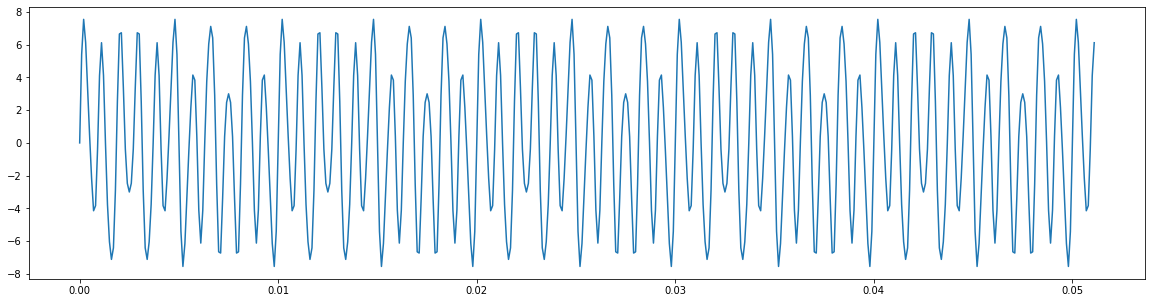

In [56]:
fs = 10000
duration = 1
f1, f2, f3 = 500, 1100, 2100

t = np.arange(int(duration*fs)) / fs
x1 = 2*np.sin(2*np.pi*f1*t)
x2 = 6*np.sin(2*np.pi*f2*t)
x3 = 1*np.sin(2*np.pi*f3*t)
x = x1+x2+x3
plt.figure(figsize=(20,5))
plt.plot(t[:512], x[:512])

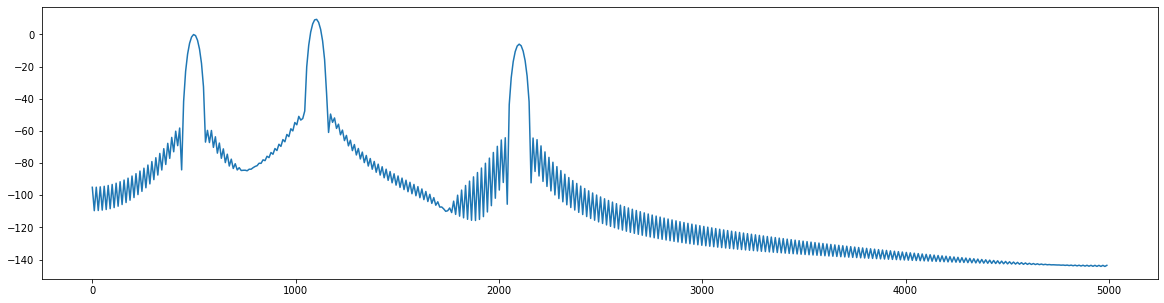

In [57]:
x = x[:512]
N = 1024
hN = N//2
mX, pX = centered_padded_fft(x, N, blackman(512))
plt.figure(figsize=(20,5))
plt.plot(np.arange(hN)/N*fs, mX) # dB
plt.show()